<a href="https://colab.research.google.com/github/jm-0703/Genetic-Hearing-Loss/blob/main/geneticdiagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Information & Data Loader

In [ ]:
## Data Load

In [ ]:
!kaggle datasets download -d saurabhshahane/genetic-diagnosis-using-machine-learning

Dataset URL: https://www.kaggle.com/datasets/saurabhshahane/genetic-diagnosis-using-machine-learning
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/178k [00:00<?, ?B/s]
100% 178k/178k [00:00<00:00, 24.6MB/s]


In [ ]:
! unzip /content/genetic-diagnosis-using-machine-learning.zip

Archive:  /content/genetic-diagnosis-using-machine-learning.zip
  inflating: Discovery Set.xlsx      
  inflating: Validation Set.xlsx     


## Data Frame
 This data set is a Kaggle Genetic Diagnosis Dataset. The objective of this data set is to support the manuscript "Machine learning-based genetic diagnosis models for hereditary hearing loss by the GJB2, SLC26A4 and MT-RNR1 variants". This data set consists of the following:
- columns
  - Diagnoses
  - gene information
- rows
  - 0: no mutations were found
  - 1: heterozyhous mutations
  - 2: homozygous mutations

**total_data : data frame for all downloaded data**


In [ ]:
import pandas as pd
total_data = pd.read_excel('/content/Discovery Set.xlsx')
total_data.columns = total_data.iloc[0]
total_data = total_data[1:]
total_data.reset_index(drop=True, inplace=True)
total_data

,Diagnoses,p.F115C,p.M195V,p.W3X,c.93delT,p.W77X,p.V167M,p.F191L,p.R75Q,c.176del16bp,...,p.S28R,p.S49T,p.S93N,p.V233L,p.V670A,p.Y214N,c.1546insC,c.1548insC,p.Q514P,c.2177_2178insCTAT
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1205,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1207,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Preprocessing Step
- cleans 'total_data' by removing all the blank rows.

In [ ]:
col_names = total_data.columns
for name in col_names:
  total_data = total_data[total_data[name] != ' ']

for i in col_names:
  total_data[i] = total_data[i].astype(int)
total_data.info()

total_data.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1208
Columns: 145 entries, Diagnoses to c.2177_2178insCTAT
dtypes: int64(145)
memory usage: 1.3 MB


,Diagnoses,p.F115C,p.M195V,p.W3X,c.93delT,p.W77X,p.V167M,p.F191L,p.R75Q,c.176del16bp,...,p.S28R,p.S49T,p.S93N,p.V233L,p.V670A,p.Y214N,c.1546insC,c.1548insC,p.Q514P,c.2177_2178insCTAT
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# EDA (Exploratory Data Analysis)

### Analysis of Hearing Loss Data Distribution
- Compares the number of samples with hearing loss to those without. If the data exhibits a significant imbalance between these two classes, we will implement strategies to balance the dataset. This ensures that our subsequent analyses and models are not biased towards the majority class, leading to more accurate and reliable results.

In [ ]:
total_data.groupby('Diagnoses').count()

,p.F115C,p.M195V,p.W3X,c.93delT,p.W77X,p.V167M,p.F191L,p.R75Q,c.176del16bp,p.R143W,...,p.S28R,p.S49T,p.S93N,p.V233L,p.V670A,p.Y214N,c.1546insC,c.1548insC,p.Q514P,c.2177_2178insCTAT
Diagnoses,,,,,,,,,,,,,,,,,,,,,
0,291,291,291,291,291,291,291,291,291,291,...,291,291,291,291,291,291,291,291,291,291
1,917,917,917,917,917,917,917,917,917,917,...,917,917,917,917,917,917,917,917,917,917


###Analysis to Select Features Correlated with Hearing Loss
- Analyze the correlation between the features and hearing loss. By selecting features that are highly correlated with hearing loss, it can help identify the primary reasons to hearing loss, thus supporting future data models and research about hearing loss.

In [ ]:
total_data.corr()

,Diagnoses,p.F115C,p.M195V,p.W3X,c.93delT,p.W77X,p.V167M,p.F191L,p.R75Q,c.176del16bp,...,p.S28R,p.S49T,p.S93N,p.V233L,p.V670A,p.Y214N,c.1546insC,c.1548insC,p.Q514P,c.2177_2178insCTAT
0,,,,,,,,,,,,,,,,,,,,,
Diagnoses,1.000000,0.022941,-0.068622,-0.015273,0.016215,0.016215,0.045996,-0.023987,0.016215,0.041257,...,0.016215,0.022941,-0.051096,0.016215,-0.024675,0.016215,0.016215,0.032470,0.022941,NaN
p.F115C,0.022941,1.000000,-0.002347,-0.002877,-0.001172,-0.001172,-0.003325,-0.002625,-0.001172,-0.008550,...,-0.001172,-0.001658,-0.001172,-0.001172,-0.001658,-0.001172,-0.001172,-0.002347,-0.001658,NaN
p.M195V,-0.068622,-0.002347,1.000000,-0.004072,-0.001659,-0.001659,-0.004706,-0.003716,-0.001659,-0.012101,...,-0.001659,-0.002347,-0.001659,-0.001659,-0.002347,-0.001659,-0.001659,-0.003322,-0.002347,NaN
p.W3X,-0.015273,-0.002877,-0.004072,1.000000,-0.002034,0.407402,-0.005769,-0.004555,-0.002034,-0.014833,...,-0.002034,-0.002877,-0.002034,-0.002034,-0.002877,-0.002034,-0.002034,-0.004072,-0.002877,NaN
c.93delT,0.016215,-0.001172,-0.001659,-0.002034,1.000000,-0.000829,-0.002350,-0.001856,-0.000829,-0.006043,...,-0.000829,-0.001172,-0.000829,-0.000829,-0.001172,-0.000829,-0.000829,-0.001659,-0.001172,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p.Y214N,0.016215,-0.001172,-0.001659,-0.002034,-0.000829,-0.000829,-0.002350,-0.001856,-0.000829,-0.006043,...,-0.000829,-0.001172,-0.000829,-0.000829,-0.001172,1.000000,-0.000829,-0.001659,-0.001172,NaN
c.1546insC,0.016215,-0.001172,-0.001659,-0.002034,-0.000829,-0.000829,-0.002350,-0.001856,-0.000829,-0.006043,...,-0.000829,-0.001172,-0.000829,-0.000829,-0.001172,-0.000829,1.000000,-0.001659,-0.001172,NaN
c.1548insC,0.032470,-0.002347,-0.003322,-0.004072,-0.001659,-0.001659,-0.004706,-0.003716,-0.001659,-0.012101,...,-0.001659,-0.002347,-0.001659,-0.001659,-0.002347,-0.001659,-0.001659,1.000000,0.352086,NaN


In [ ]:
corr_matrix = total_data.corr()['Diagnoses'].abs()
sorted_corr = corr_matrix.sort_values(ascending=False)
top_20_corr = sorted_corr[sorted_corr != 1].head(20)
top_20_corr.index

Index(['c.235delC', 'p.V37I', 'p.M195V', 'c.919_2A>G', 'c.299_300delAT',
       'p.I30V', 'p.S93N', 'c.35_36insG', 'c.2039delT', 'p.I363L', 'p.V63L',
       'c.171_172insG', 'p.A574T', 'p.G197R', 'p.N392Y', 'p.V167M',
       'c.176del16bp', 'p.V659L', 'p.T123N', 'c.1179_1181delTCT'],
      dtype='object', name=0)

###Visual Analysis of the Relationship Between Hearing Loss and Genetic Factors
- Implements bar graphs to visualize the relationship between hearing loss and genetic factors. This helps to describe the data distribution across various categories, and through the visualization of the correlation of hearing loss and genetic  information, ___
청력 상실과 유전적 요인 간의 관계를 시각적으로 탐구하기 위해 막대 그래프를 사용하여 청력 상실이 있는 샘플과 없는 샘플의 수를 제시하여 분석을 수행합니다. 이 시각화는 다양한 범주에 걸친 데이터 분포를 명확하게 설명하는 데 도움이 되며 청력 상실과 잠재적인 유전적 상관관계에 대한 시각적인 정보 제공을 통해 ______.


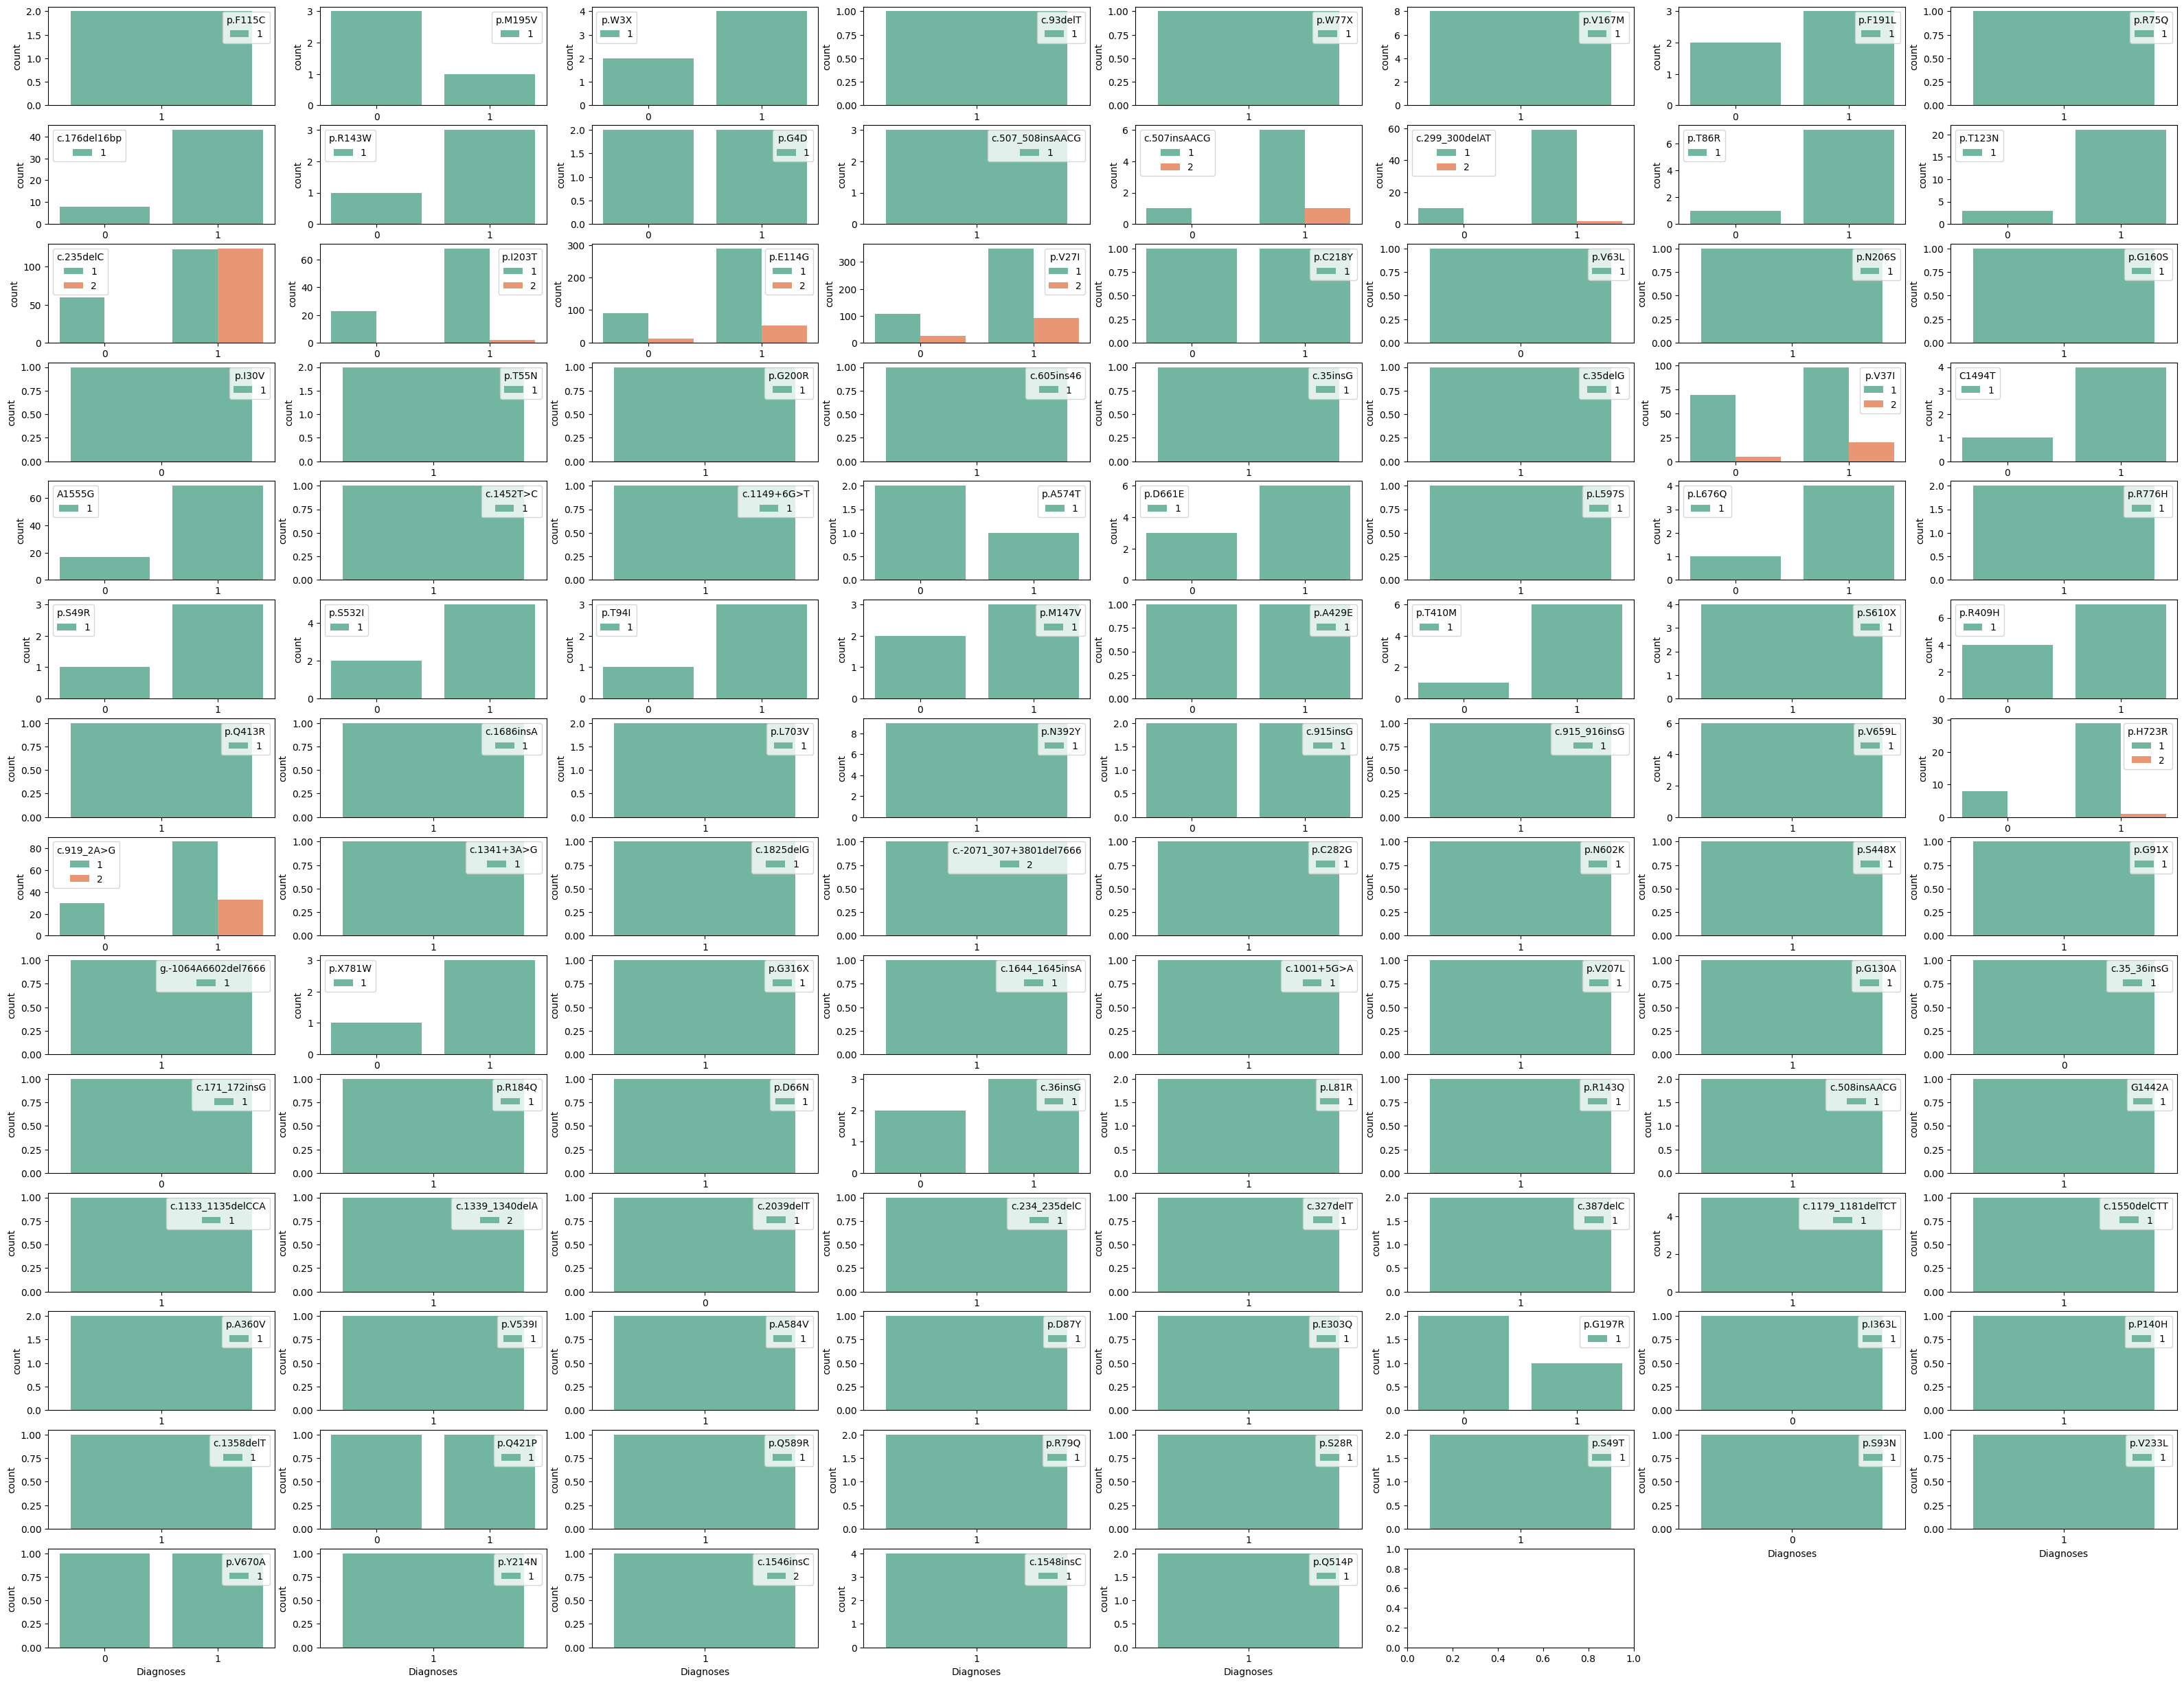

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(40,40))
genes=[]
idx = 0
for _, col in enumerate(col_names[1: ]):
  plt.subplot(18,8,idx+1)
  select_data = total_data[total_data[col] > 0]
  if len(select_data) == 0:
    continue
  data = select_data.groupby([col_names[0],col]).size().reset_index(name='count')
  sns.barplot(data=data, x=col_names[0],y='count',hue=col, palette='Set2')
  idx += 1
  genes += [col]
plt.show()





In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt



# Implementation of Decision Tree for Predicting Hearing Loss
### Selection of Predictive Features
- X: The predictive features are the top 20 variables with the highest correlation to the target variable.
- y: diagnoses of hearing loss and no hearing loss
- The accuracy of the model : 77.96%

In [ ]:
X = total_data[top_20_corr.index]
y = total_data['Diagnoses']


In [ ]:
total_data.head(5)

,Diagnoses,p.F115C,p.M195V,p.W3X,c.93delT,p.W77X,p.V167M,p.F191L,p.R75Q,c.176del16bp,...,p.S28R,p.S49T,p.S93N,p.V233L,p.V670A,p.Y214N,c.1546insC,c.1548insC,p.Q514P,c.2177_2178insCTAT
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train,X_Test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [ ]:
y_pred = clf.predict(X_Test)
acc = accuracy_score(y_test,y_pred)
print(f'accuracy = {acc * 100:.2f} %')


accuracy = 77.96 %


In [ ]:
X_train,X_Test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
no_test_y = y_test[y_test == 0]
no_idx = no_test_y.index
no_test_x = X_Test.loc[no_idx]

In [ ]:
yes_test_y = y_test[y_test == 1]
yes_idx = yes_test_y.index
yes_test_x = X_Test.loc[yes_idx]

In [ ]:

clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [ ]:
y_pred = clf.predict(no_test_x)
acc = accuracy_score(no_test_y,y_pred)
print(f'accuracy = {acc * 100:.2f} %')
y_pred = clf.predict(yes_test_x)
acc = accuracy_score(yes_test_y,y_pred)
print(f'accuracy = {acc * 100:.2f} %')

accuracy = 40.59 %
accuracy = 85.50 %


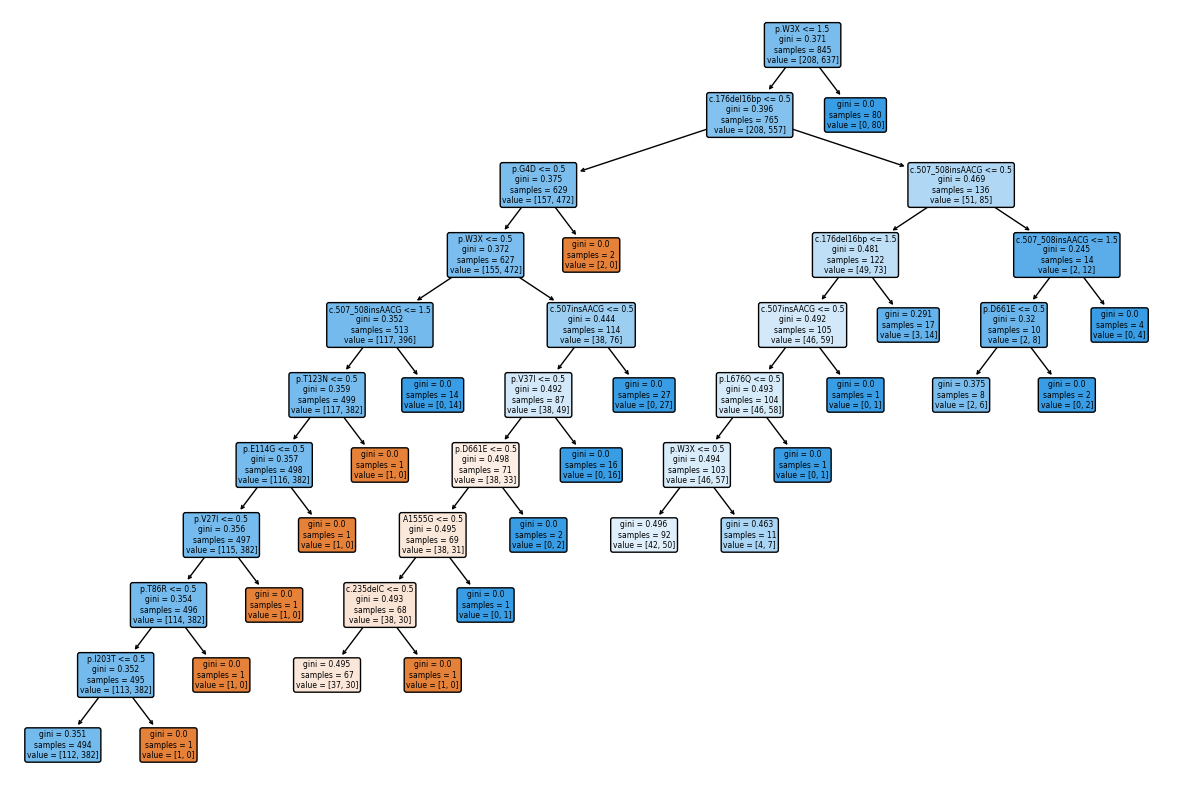

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True,feature_names= important_feat,rounded=True)
plt.show()

0일때와 1일때의 숫자를 맞춰서 decision tree 만듬

In [ ]:
X1 = total_data[total_data['Diagnoses']==0][top_20_corr.index.tolist()+['Diagnoses']]
X2 = total_data[total_data['Diagnoses']==1][top_20_corr.index.tolist()+['Diagnoses']].sample(n=291,random_state=42)
print(f'class 0: {len(X1)}')
print(f"class 1: {len(X2)}")
select_d = pd.concat([X1,X2],axis=0)
X = select_d[top_20_corr.index]
y = select_d['Diagnoses']
print(f"tatoal data: {len(X)}")

class 0: 291
class 1: 291
tatoal data: 582


In [ ]:
X_train,X_Test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [ ]:
y_pred = clf.predict(X_Test)
acc = accuracy_score(y_test,y_pred)
print(f'accuracy = {acc * 100:.2f} %')

accuracy = 64.57 %


In [ ]:
features = []
for name in top_20_corr.index.tolist():
  if name in important_feat:
    features += [name]
features

['c.235delC',
 'p.V37I',
 'c.919_2A>G',
 'c.299_300delAT',
 'c.35_36insG',
 'p.I363L',
 'c.171_172insG',
 'p.G197R',
 'p.N392Y',
 'c.176del16bp',
 'p.T123N',
 'c.1179_1181delTCT']

In [ ]:
X1 = total_data[total_data['Diagnoses']==0][features+['Diagnoses']]
X2 = total_data[total_data['Diagnoses']==1][features+['Diagnoses']].sample(n=291,random_state=42)
print(f'class 0: {len(X1)}')
print(f"class 1: {len(X2)}")
select_d = pd.concat([X1,X2],axis=0)
X = select_d[features]
y = select_d['Diagnoses']
print(f"tatoal data: {len(X)}")

class 0: 291
class 1: 291
tatoal data: 582


In [ ]:
X_train,X_Test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [ ]:
y_pred = clf.predict(X_Test)
acc = accuracy_score(y_test,y_pred)
print(f'accuracy = {acc * 100:.2f} %')

accuracy = 65.14 %


In [ ]:
X = total_data[genes]
y = total_data['Diagnoses']
X.head()

,p.F115C,p.M195V,p.W3X,c.93delT,p.W77X,p.V167M,p.F191L,p.R75Q,c.176del16bp,p.R143W,...,p.R79Q,p.S28R,p.S49T,p.S93N,p.V233L,p.V670A,p.Y214N,c.1546insC,c.1548insC,p.Q514P
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train,X_Test,y_train,y_test = train_test_split(X,y,test_size=0.3)
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(X_Test)
acc = accuracy_score(y_test,y_pred)
print(f'accuracy = {acc * 100:.2f} %')

accuracy = 74.10 %


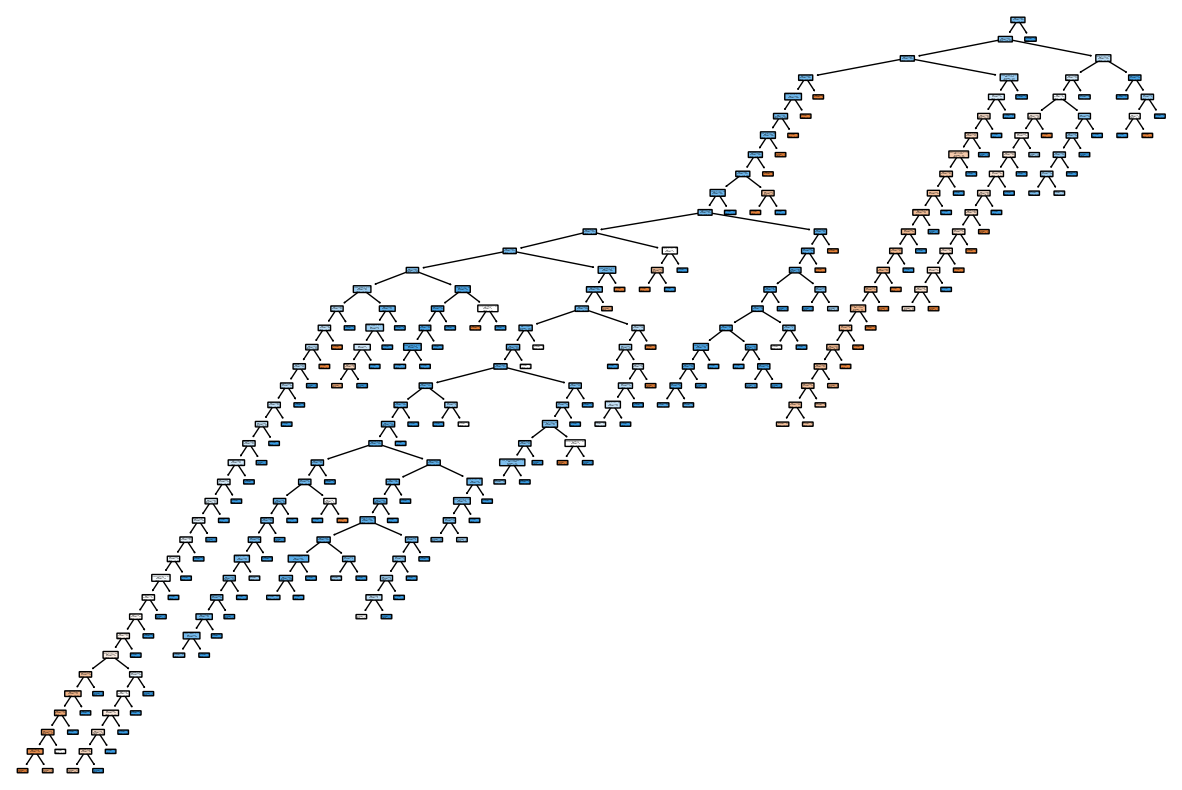

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True,feature_names= genes,rounded=True)
plt.show()

In [ ]:
feature_importances = clf.feature_importances_
important_feat = []
for feature,importance in zip(genes,feature_importances):
  if importance >= 0.005:
    print(f'{feature}: {importance:.4f}')
    important_feat += [feature]


p.W3X: 0.0338
c.176del16bp: 0.1127
p.G4D: 0.0088
c.507_508insAACG: 0.0124
c.507insAACG: 0.0236
c.299_300delAT: 0.0990
p.T86R: 0.0270
p.T123N: 0.0156
c.235delC: 0.1133
p.I203T: 0.0525
p.E114G: 0.0217
p.V27I: 0.0393
p.C218Y: 0.0067
p.T55N: 0.0103
c.605ins46: 0.0072
c.35delG: 0.0065
p.V37I: 0.0599
A1555G: 0.0135
p.D661E: 0.0067
p.L676Q: 0.0067
p.S49R: 0.0074
p.A429E: 0.0092
p.R409H: 0.0095
p.Q413R: 0.0056
p.N392Y: 0.0089
p.H723R: 0.0379
c.919_2A>G: 0.0612
p.X781W: 0.0051
p.G130A: 0.0067
c.35_36insG: 0.0092
c.171_172insG: 0.0091
c.36insG: 0.0195
p.L81R: 0.0075
c.1179_1181delTCT: 0.0149
p.G197R: 0.0093
p.I363L: 0.0091
p.Q514P: 0.0071


In [ ]:
X = total_data[important_feat]

In [ ]:
X_train,X_Test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
no_test_y = y_test[y_test == 0]
no_idx = no_test_y.index
no_test_x = X_Test.loc[no_idx]

In [ ]:
yes_test_y = y_test[y_test == 1]
yes_idx = yes_test_y.index
yes_test_x = X_Test.loc[yes_idx]

In [ ]:

clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [ ]:
y_pred = clf.predict(no_test_x)
acc = accuracy_score(no_test_y,y_pred)
print(f'accuracy = {acc * 100:.2f} %')
y_pred = clf.predict(yes_test_x)
acc = accuracy_score(yes_test_y,y_pred)
print(f'accuracy = {acc * 100:.2f} %')

accuracy = 40.59 %
accuracy = 85.50 %


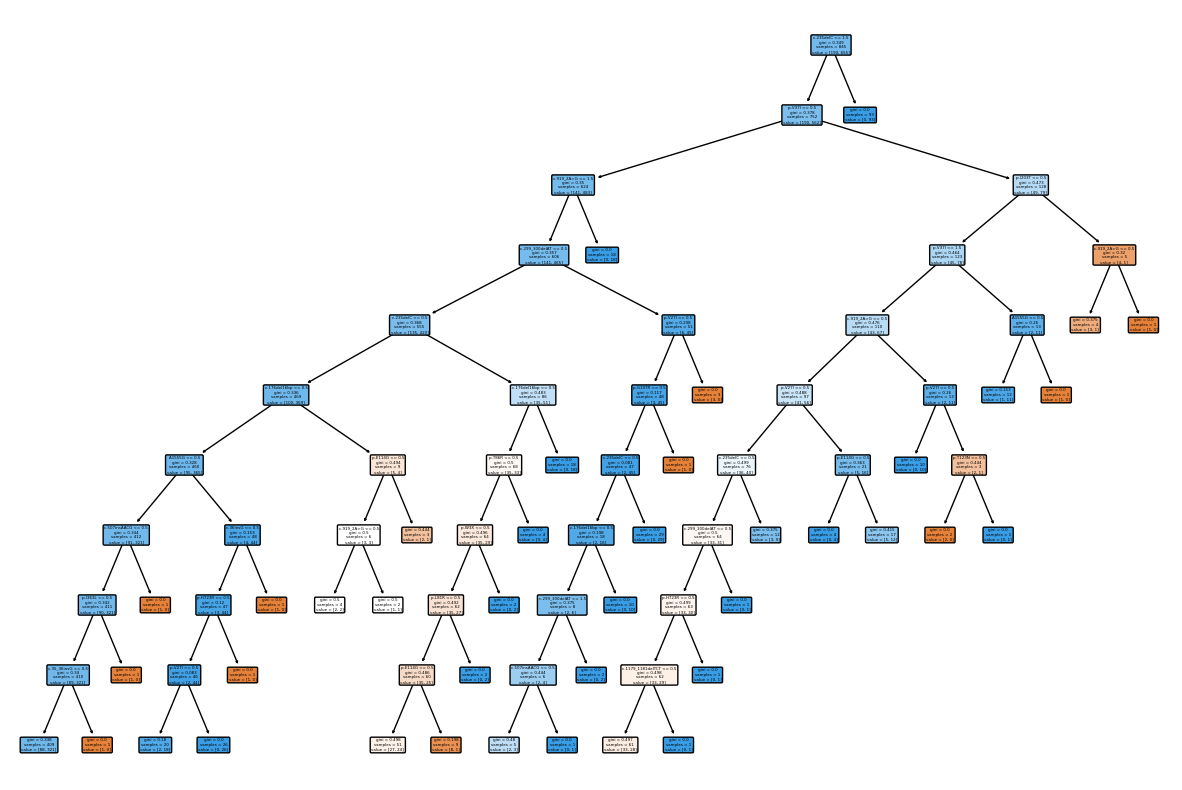

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True,feature_names= important_feat,rounded=True)
plt.show()

청력 손실 있는 것과 없는 것 두개 숫자 카운트하고 숫자 맞춤

In [ ]:
no_hloss = total_data[total_data['Diagnoses']==0]
yes_hless = total_data[total_data['Diagnoses']==1]
print(f'class 0: {len(no_hloss)}')
print(f"class 1: {len(yes_hless)}")

class 0: 291
class 1: 917


In [ ]:
X1 = total_data[total_data['Diagnoses']==0][important_feat+['Diagnoses']]
X2 = total_data[total_data['Diagnoses']==1][important_feat+['Diagnoses']].sample(n=291,random_state=42)
print(f'class 0: {len(X1)}')
print(f"class 1: {len(X2)}")
select_d = pd.concat([X1,X2],axis=0)
X = select_d[important_feat]
y = select_d['Diagnoses']
print(f"tatoal data: {len(X)}")

class 0: 291
class 1: 291
tatoal data: 582


In [ ]:
X_train,X_Test,y_train,y_test = train_test_split(X,y,test_size=0.3)

청각장애인일 경우 yes 아닐 경우 no 나눠서 만듬

In [ ]:
no_test_y = y_test[y_test == 0]
no_idx = no_test_y.index
no_test_x = X_Test.loc[no_idx]

In [ ]:
yes_test_y = y_test[y_test == 1]
yes_idx = yes_test_y.index
yes_test_x = X_Test.loc[yes_idx]

In [ ]:
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [ ]:
y_pred = clf.predict(no_test_x)
acc = accuracy_score(no_test_y,y_pred)
print(f'accuracy = {acc * 100:.2f} %')
y_pred = clf.predict(yes_test_x)
acc = accuracy_score(yes_test_y,y_pred)
print(f'accuracy = {acc * 100:.2f} %')

accuracy = 60.47 %
accuracy = 76.40 %


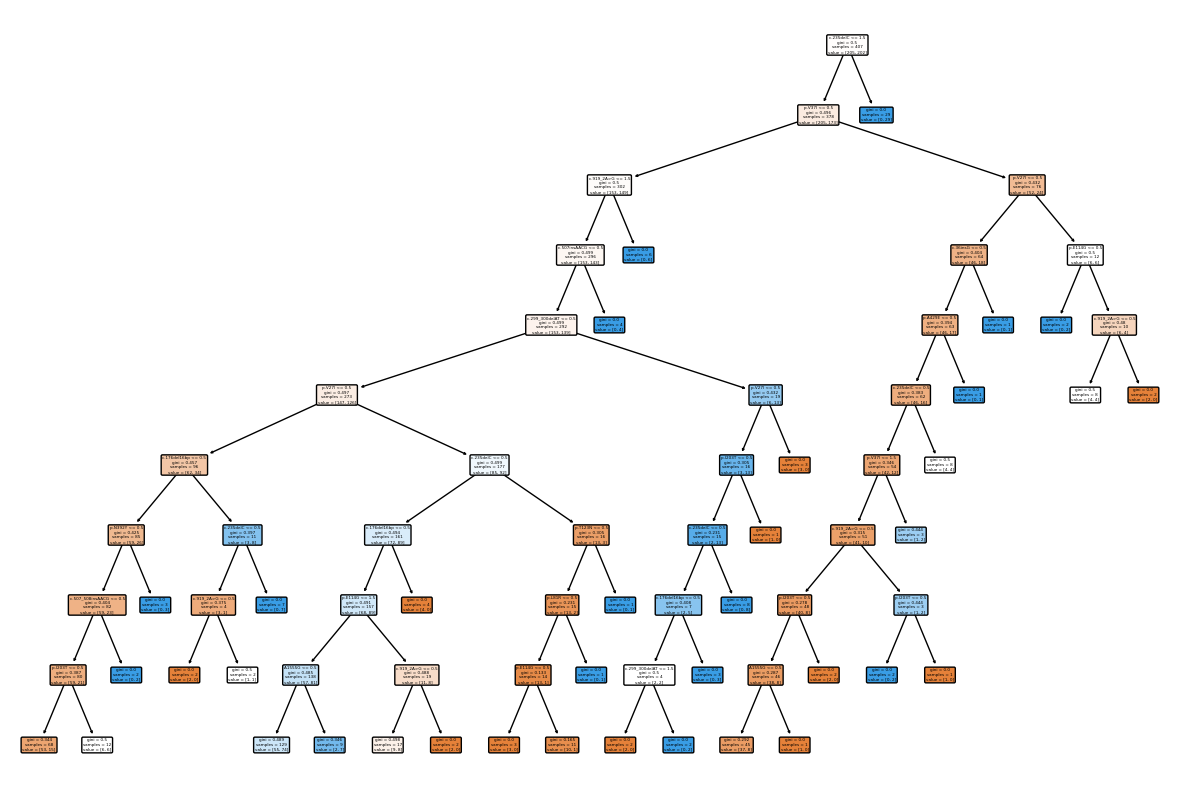

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True,feature_names= important_feat,rounded=True)
plt.show()